 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Creating a Path to the File Using Pathlib
algo_filepath = Path ("algo_returns.csv")
whalereturns_filepath = Path ("whale_returns.csv")
sptsxhistorical_filepath = Path ("sp_tsx_history.csv")

# Reading the CSV into a Pandas DataFrame
algo_df = pd.read_csv(algo_filepath, index_col="Date", parse_dates=True, infer_datetime_format=True)
whalereturns_df = pd.read_csv(whalereturns_filepath, index_col="Date", parse_dates=True, infer_datetime_format=True)
sptsxhistorical_df = pd.read_csv(sptsxhistorical_filepath, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

In [2]:
# Reading whale returns
whalereturns_df.head(3)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213


In [3]:
# Count nulls
whalereturns_df.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [4]:
# Drop nulls
whalereturns_df = whalereturns_df.dropna().copy()

In [5]:
whalereturns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [7]:
# Count nulls
# Identify and determine null
algo_df.isnull().mean()*100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [8]:
# Drop nulls
algo_df= algo_df.dropna().copy()

In [9]:
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices
sptsxhistorical_df

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [11]:
# Check Data Types
sptsxhistorical_df.dtypes

Close    object
dtype: object

In [12]:
sptsxhistorical_df.count()

Close    1818
dtype: int64

In [13]:
sptsxhistorical_df["Close"] = sptsxhistorical_df["Close"].str.replace("$", "")

C:\Users\rdrit\AppData\Local\Temp\ipykernel_21756\4172076270.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sptsxhistorical_df["Close"] = sptsxhistorical_df["Close"].str.replace("$", "")


In [14]:
sptsxhistorical_df.head()

,Close
Date,
2012-10-01,"12,370.19"
2012-10-02,"12,391.23"
2012-10-03,"12,359.47"
2012-10-04,"12,447.68"
2012-10-05,"12,418.99"


In [15]:
# Fix Data Types
sptsxhistorical_df["Close"]=sptsxhistorical_df["Close"].str.replace(",","")
sptsxhistorical_df["Close"]= sptsxhistorical_df["Close"].astype("float")

In [16]:
sptsxhistorical_df.count()

Close    1818
dtype: int64

In [17]:
# Calculate Daily Returns
spdaily_return = sptsxhistorical_df.pct_change()
spdaily_return.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [18]:
# Drop nulls
spdaily_return = spdaily_return.dropna().copy()

In [19]:
spdaily_return

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [20]:
# Rename `Close` Column to be specific to this portfolio.
spdaily_return = spdaily_return.rename(columns={"Close":"S&P TSX"})

In [21]:
spdaily_return.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [22]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

combined_df = pd.concat([whalereturns_df,algo_df,spdaily_return],axis="columns", join="inner")
combined_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily_Returns'}, xlabel='Date'>

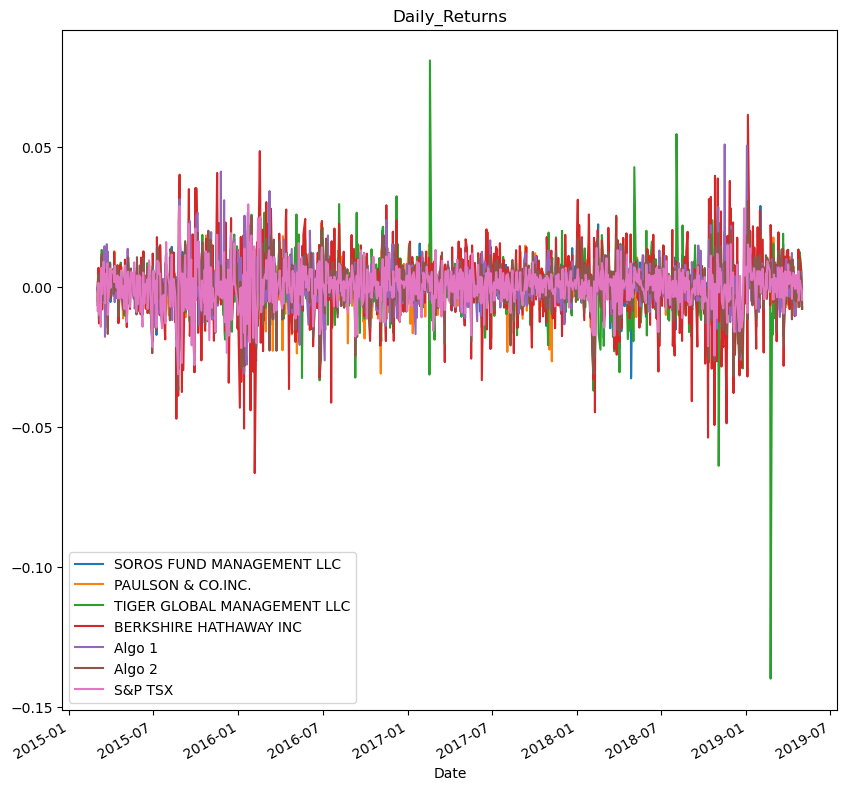

In [23]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(10,10), title="Daily_Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

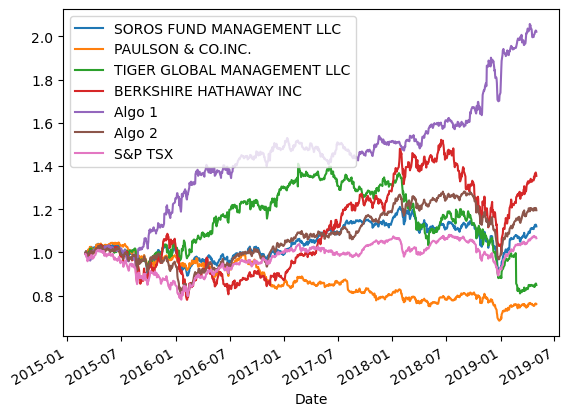

In [24]:
# Calculate cumulative returns of all portfolios
cumulative_return = (combined_df+1).cumprod()

# Plot cumulative returns
cumulative_return.plot()

In [25]:
# Does any portfolio outperform the S&P TSX 60?
# Yes, other than Paulson&Co. INC. and Tiger Global Management Inc, rest all portfoilio seems to outperform S&P TSX60.

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

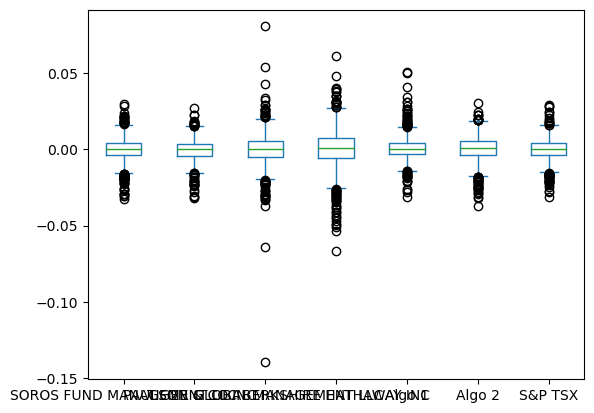

In [26]:
# Box plot to visually show risk
combined_df.plot(kind="box")

### Calculate Standard Deviations

In [27]:
# Calculate the daily standard deviations of all portfolios
combined_df_std = combined_df.std()
combined_df_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [28]:
# Calculate  the daily standard deviation of S&P TSX 60

# Determine which portfolios are riskier than the S&P TSX 60
combined_df_std = combined_df_std.sort_values(ascending=False)
combined_df_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX                        0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

In [29]:
#Determine which portfolios are riskier than the S&P TSX 60
## Paulson & Co. Inc is riskier than S&P TSX 60

### Calculate the Annualized Standard Deviation

In [30]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_df_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX                        0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

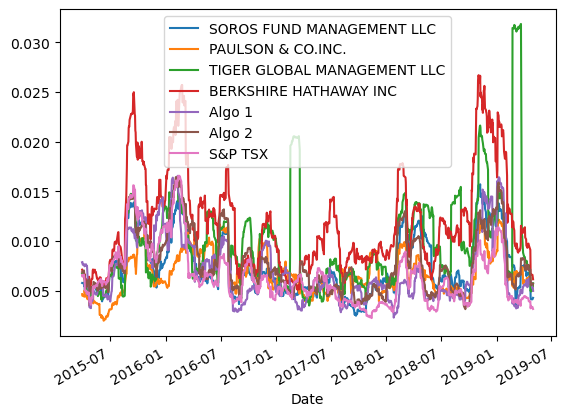

In [31]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
roll_std = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
roll_std.plot()

### Calculate and plot the correlation

In [32]:
# Calculate the correlation
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


In [33]:
# Display de correlation matrix

import seaborn as sns

<AxesSubplot:>

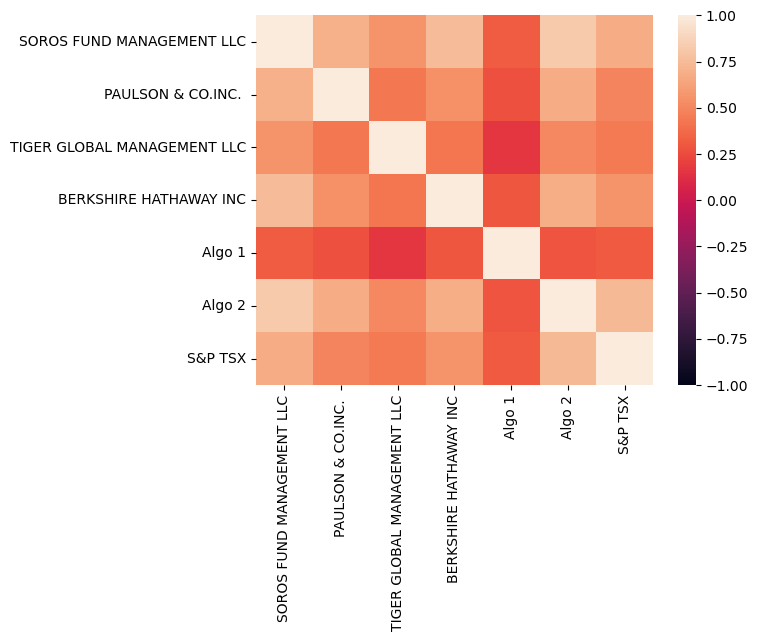

In [34]:
sns.heatmap(correlation, vmin=-1, vmax=1)

In [35]:
# Correlation Matrix

correlation.style.background_gradient()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [36]:
# Calculate covariance of a single portfolio:

# Calculate variance of S&P TSX

variance = combined_df['S&P TSX'].rolling(window=60).var()
variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: S&P TSX, Length: 1029, dtype: float64

In [37]:
covariance = combined_df['Algo 1'].rolling(window=60).cov(combined_df['S&P TSX'])
covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000002
2019-04-26    0.000002
2019-04-29    0.000002
2019-04-30    0.000002
2019-05-01    0.000002
Length: 1029, dtype: float64

In [38]:
# Computing beta

algo1_beta = covariance / variance
algo1_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.143726
2019-04-26    0.145294
2019-04-29    0.141913
2019-04-30    0.160629
2019-05-01    0.118788
Length: 1029, dtype: float64

<AxesSubplot:xlabel='Date'>

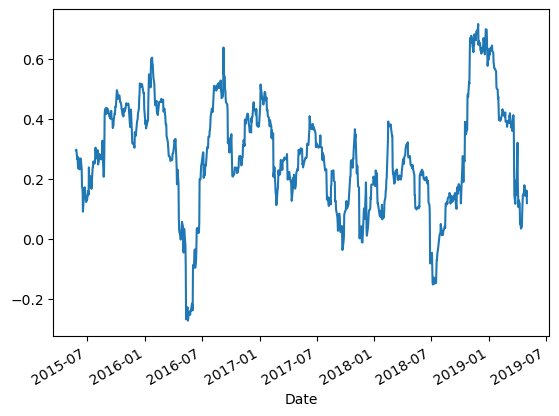

In [39]:
# Plot beta trend

algo1_beta.plot()

In [40]:
algo1_beta.mean()

0.27685517668981313

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

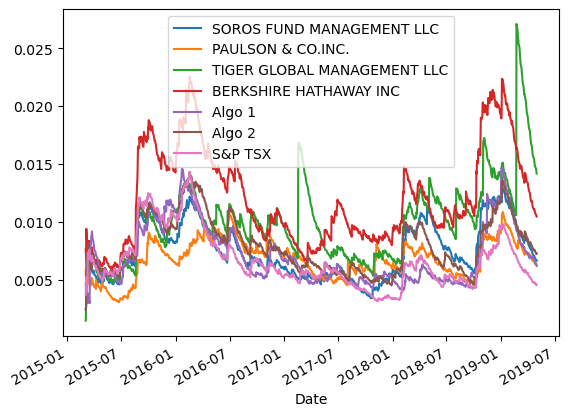

In [41]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Annualized Sharpe Ratios
sharpe_ratios = ((combined_df.mean()*252) / (combined_df.std() * np.sqrt(252)))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

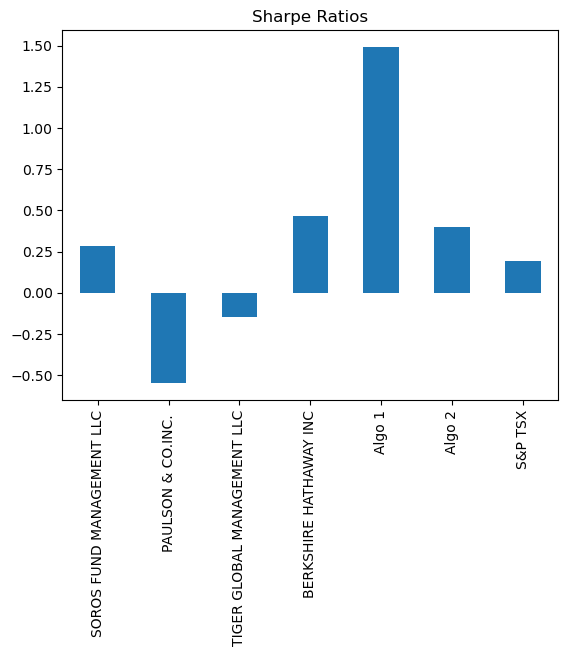

In [43]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In [44]:
##Yes it did as shown in the above graph.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [45]:
# Reading data from 1st stock, # Reset Date index
ihistorical_filepath = Path ("l_historical.csv")
ihistorical_df = pd.read_csv(ihistorical_filepath, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [46]:
ihistorical_df.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [47]:
# Reorganize portfolio data by having a column per symbol
ihistorical_df = ihistorical_df.drop(columns=["Symbol"])
ihistorical_df.head()

,Close
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [48]:
ihistorical_df = ihistorical_df.rename(columns={"Close":"Ihistorical"})
ihistorical_df.head()

,Ihistorical
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [49]:
ihistorical_df.isnull().mean() * 100

Ihistorical    0.0
dtype: float64

In [50]:
# Calculate daily returns
daily_returns_ihist = ihistorical_df.pct_change()

In [51]:
daily_returns_ihist.head()

,Ihistorical
Date,
2018-01-02,NaN
2018-01-03,-0.010002
2018-01-04,0.000174
2018-01-05,0.000000
2018-01-08,-0.009753


In [52]:
daily_returns_ihist.isnull().mean() * 100

Ihistorical    0.199601
dtype: float64

In [53]:
# Drop NAs
daily_returns_ihist= daily_returns_ihist.dropna().copy()

In [54]:
daily_returns_ihist.head()

,Ihistorical
Date,
2018-01-03,-0.010002
2018-01-04,0.000174
2018-01-05,0.000000
2018-01-08,-0.009753
2018-01-09,0.008969


In [55]:
# Reading data from 2nd stock, # Reset Date index
otexhistorical_filepath = Path ("otex_historical.csv")
otexhistorical_df = pd.read_csv(otexhistorical_filepath, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [56]:
otexhistorical_df.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [57]:
# Reorganize portfolio data by having a column per symbol
otexhistorical_df = otexhistorical_df.drop(columns=["Symbol"])
otexhistorical_df.head()

,Close
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [58]:
otexhistorical_df = otexhistorical_df.rename(columns={"Close" : "Otex"})

In [59]:
# Calculate daily returns
daily_returns_otexhist = otexhistorical_df.pct_change()
daily_returns_otexhist.head()

,Otex
Date,
2018-01-02,NaN
2018-01-03,-0.011703
2018-01-04,-0.003715
2018-01-05,-0.007924
2018-01-08,-0.009631


In [60]:
daily_returns_otexhist.isnull().mean()*100

Otex    0.199601
dtype: float64

In [61]:
# Drop NAs
daily_returns_otexhist = daily_returns_otexhist.dropna().copy()

In [62]:
daily_returns_otexhist.head()

,Otex
Date,
2018-01-03,-0.011703
2018-01-04,-0.003715
2018-01-05,-0.007924
2018-01-08,-0.009631
2018-01-09,-0.000712


In [63]:
# Reading data from 3rd stock, # Reset Date index
shophistorical_filepath = Path ("shop_historical.csv")
shophistorical_df = pd.read_csv(shophistorical_filepath, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [64]:
shophistorical_df.count()

Symbol    501
Close     501
dtype: int64

In [65]:
shophistorical_df.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [66]:
# Reorganize portfolio data by having a column per symbol
shophistorical_df = shophistorical_df.drop(columns=["Symbol"])

In [67]:
shophistorical_df = shophistorical_df.rename(columns={"Close":"ShopHist"})

In [68]:
shophistorical_df.head()

,ShopHist
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [69]:
# Calculate daily returns
daily_returns_shophist = shophistorical_df.pct_change()

In [70]:
daily_returns_shophist.head()

,ShopHist
Date,
2018-01-02,NaN
2018-01-03,0.023398
2018-01-04,0.017092
2018-01-05,-0.001455
2018-01-08,0.016392


In [71]:
daily_returns_shophist.isnull().mean()*100

ShopHist    0.199601
dtype: float64

In [72]:
# Drop NAs
daily_returns_shophist = daily_returns_shophist.dropna().copy()

In [73]:
daily_returns_shophist.head()

,ShopHist
Date,
2018-01-03,0.023398
2018-01-04,0.017092
2018-01-05,-0.001455
2018-01-08,0.016392
2018-01-09,-0.011254


In [74]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([daily_returns_ihist,daily_returns_otexhist,daily_returns_shophist], axis = "columns", join = "inner")

my_portfolio

,Ihistorical,Otex,ShopHist
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254
...,...,...,...
2019-12-20,0.003547,0.024441,-0.005503
2019-12-23,-0.003240,-0.013463,-0.003118
2019-12-24,-0.000148,-0.007773,0.026915


In [75]:
# Display sample data
my_portfolio.head()

,Ihistorical,Otex,ShopHist
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [76]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
myportfolio_returns = my_portfolio.dot(weights)

# Display sample data
myportfolio_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [77]:
# Join your returns DataFrame to the original returns DataFrame
combined_df["MyPortfolio"]=myportfolio_returns
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,MyPortfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,NaN


In [78]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df = combined_df.dropna().copy()
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,MyPortfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003303


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [79]:
# Calculate the annualized `std`

myportfolio_df_std = combined_df.std()
my_annualized_std = myportfolio_df_std * np.sqrt(252)
my_annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.227445
MyPortfolio                    0.224346
TIGER GLOBAL MANAGEMENT LLC    0.219833
SOROS FUND MANAGEMENT LLC      0.145675
Algo 2                         0.137664
Algo 1                         0.120028
PAULSON & CO.INC.              0.114343
S&P TSX                        0.099121
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

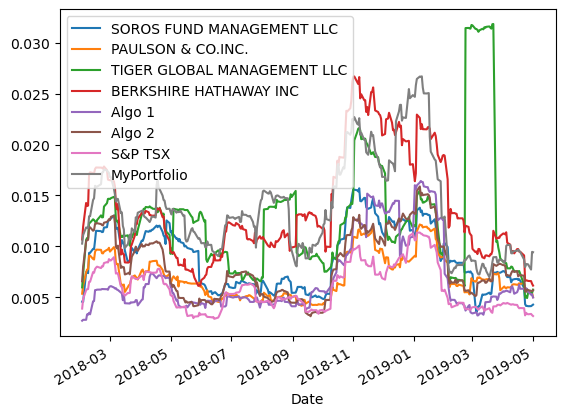

In [80]:
# Calculate rolling standard deviation # Plot rolling standard deviation
combined_df.rolling(window=21).std().plot()

### Calculate and plot the correlation

<AxesSubplot:>

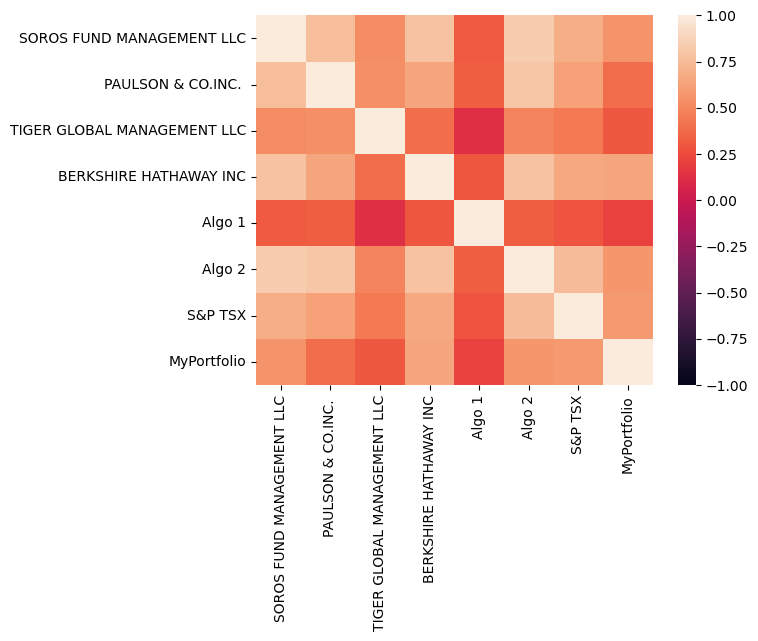

In [81]:
# Calculate and plot the correlation
my_correlation = combined_df.corr()
sns.heatmap(my_correlation, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [82]:
# Calculate and plot Beta
my_variance = combined_df['S&P TSX'].rolling(window=60).var()
my_variance 

Date
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: S&P TSX, Length: 328, dtype: float64

In [83]:
my_covariance = combined_df['MyPortfolio'].rolling(window=60).cov(combined_df['S&P TSX'])
my_covariance

Date
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
                ...   
2019-04-25    0.000013
2019-04-26    0.000013
2019-04-29    0.000013
2019-04-30    0.000013
2019-05-01    0.000012
Length: 328, dtype: float64

In [84]:
my_beta = covariance / variance
my_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.143726
2019-04-26    0.145294
2019-04-29    0.141913
2019-04-30    0.160629
2019-05-01    0.118788
Length: 1029, dtype: float64

<AxesSubplot:xlabel='Date'>

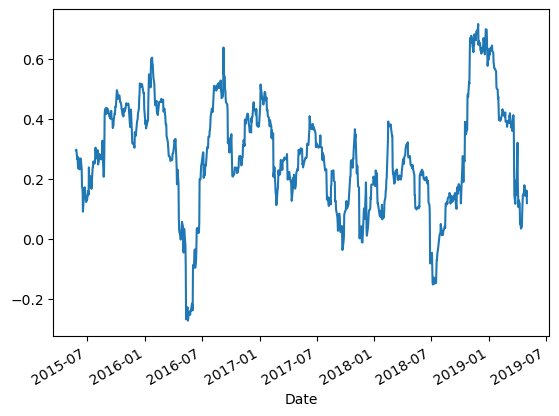

In [85]:
my_beta.plot()

In [86]:
##Alternatively - rolling beta:

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of MyPortfolio Returns vs. S&P TSX Returns'}, xlabel='Date'>

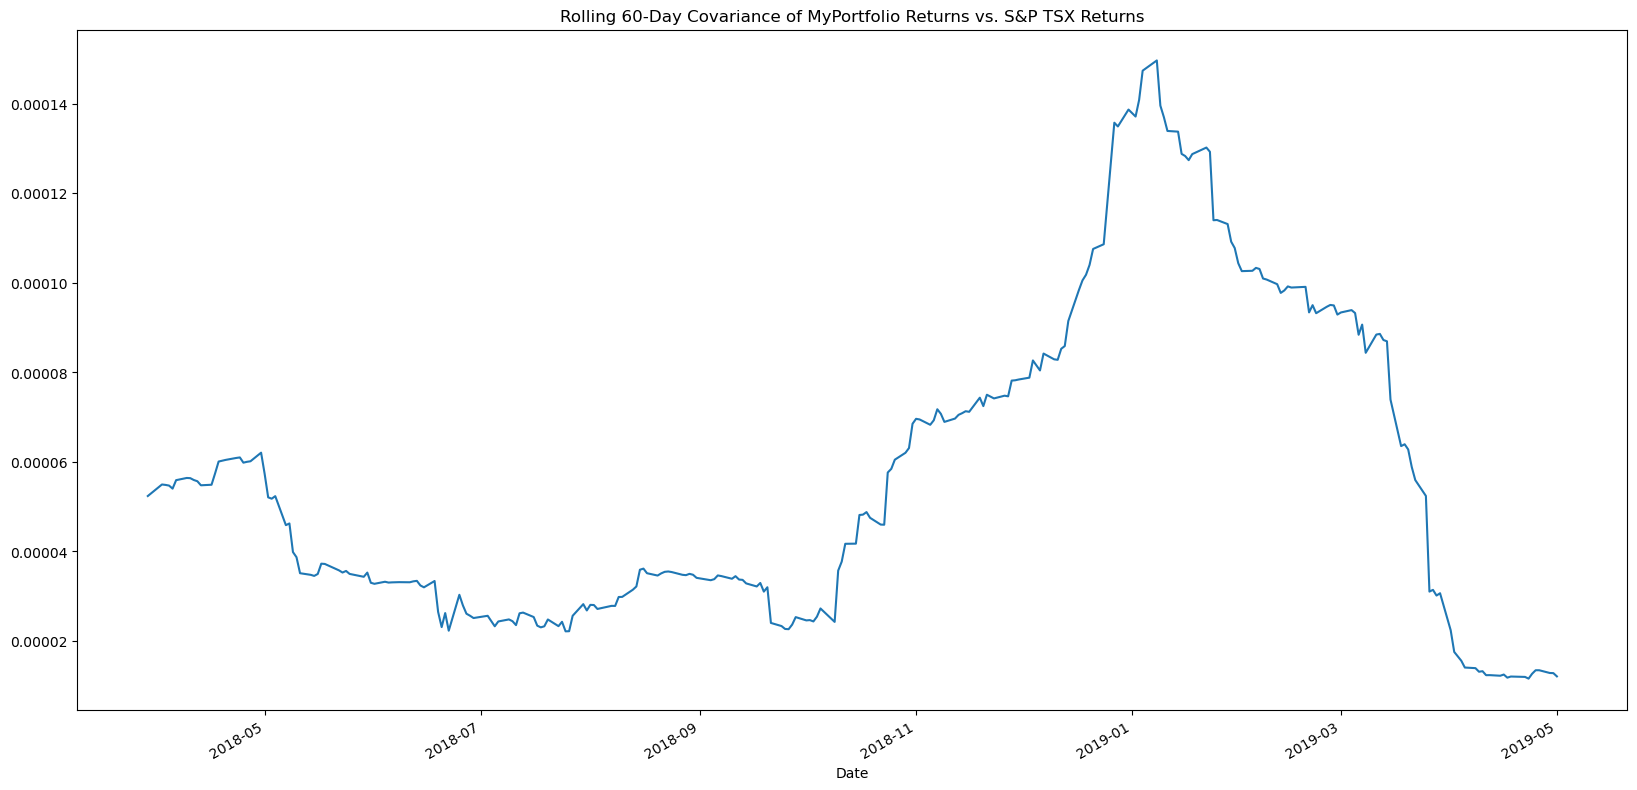

In [87]:
rolling_covariance = combined_df['MyPortfolio'].rolling(window=60).cov(combined_df['S&P TSX'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of MyPortfolio Returns vs. S&P TSX Returns')

<AxesSubplot:title={'center':'Rolling 60-Day Variance of S&P TSX Returns'}, xlabel='Date'>

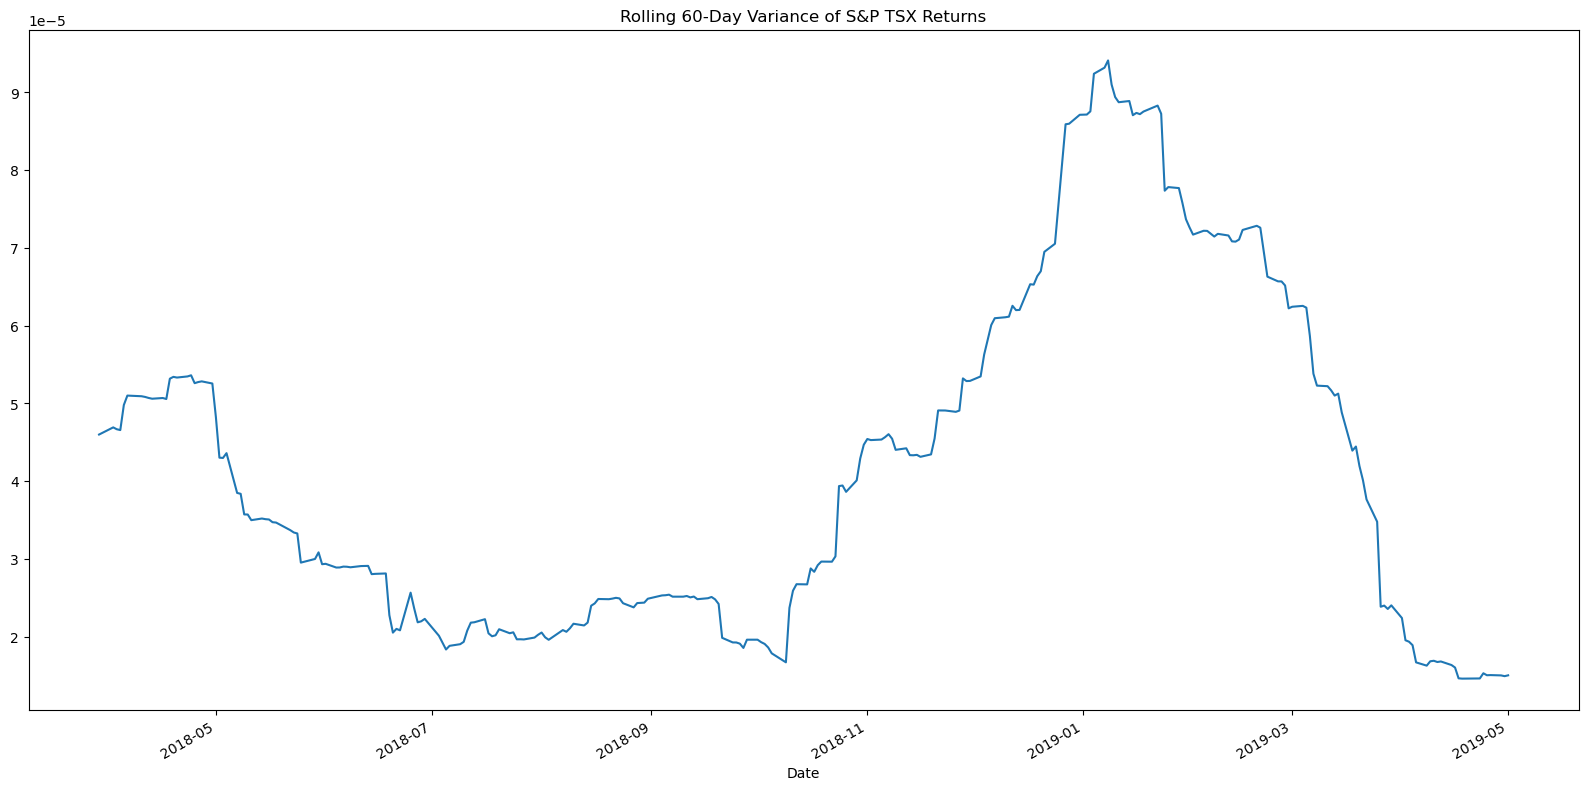

In [88]:
rolling_variance = combined_df['S&P TSX'].rolling(window=60).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 60-Day Variance of S&P TSX Returns')

<AxesSubplot:title={'center':'Rolling 60-Day Beta of MyPortfolio'}, xlabel='Date'>

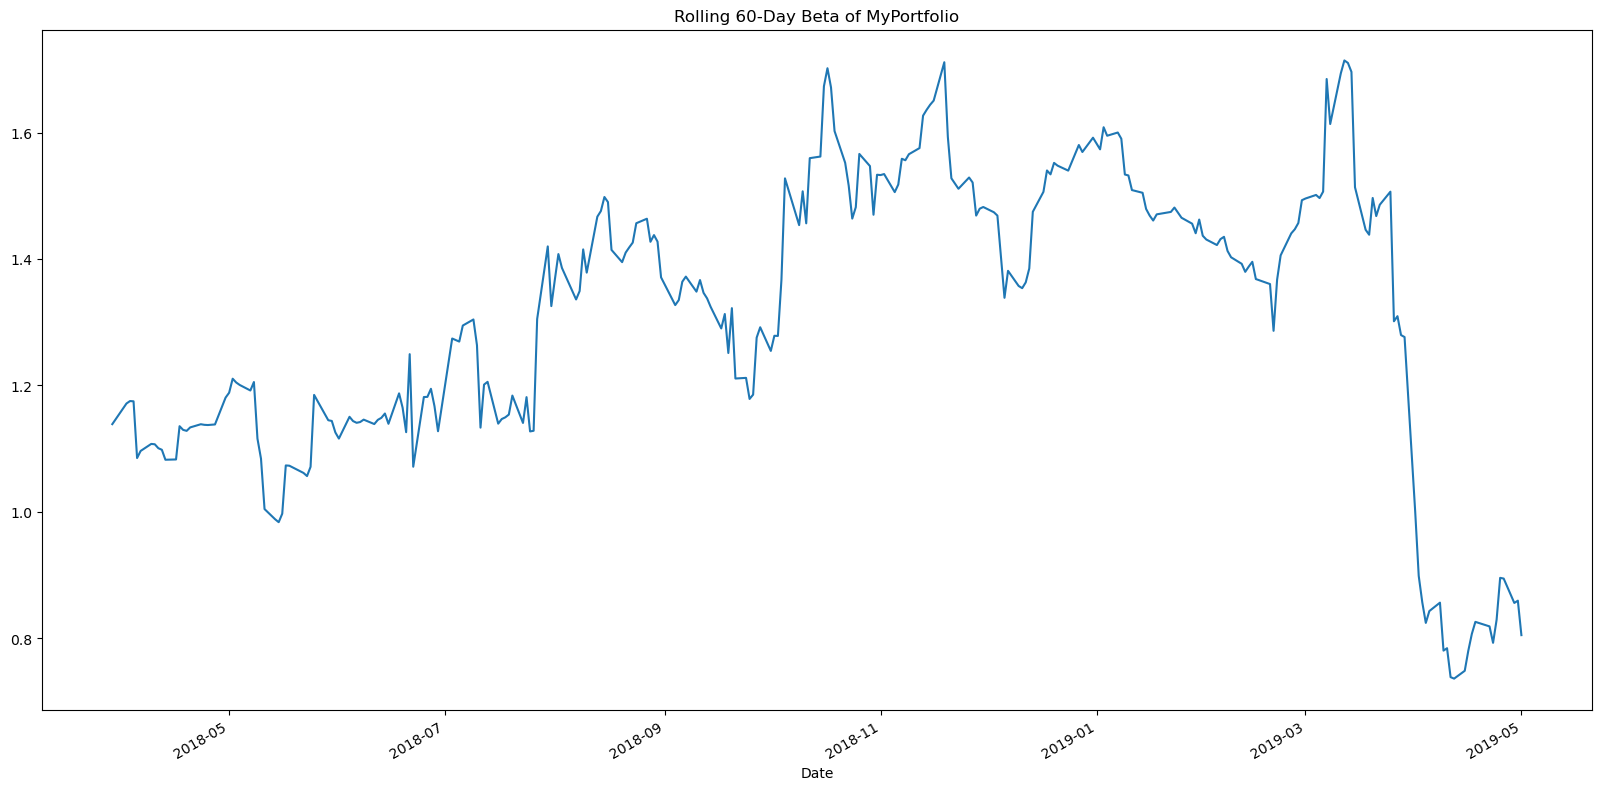

In [89]:
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of MyPortfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [90]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios1 = ((combined_df.mean()*252) / (combined_df.std() * np.sqrt(252)))

<AxesSubplot:>

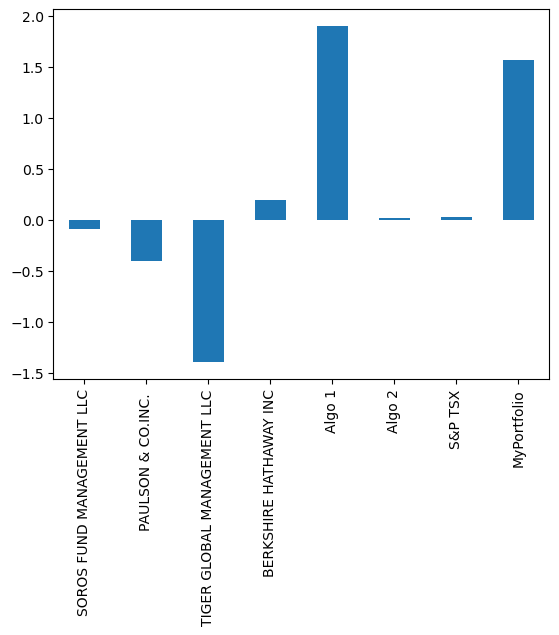

In [91]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios1.plot.bar()

### How does your portfolio do?

Write your answer here!